<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_case_study_Milestone__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗺️ <font color='crimson'>**Milestone #3: Geospatial Analysis & Model Optimization**</font>

Getting Started

In [3]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Loading libraries for Model Optimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

# Load your cleaned data
df_jp = pd.read_csv('/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/df_clean.csv')
df_jp['Date'] = pd.to_datetime(df_jp['Date'])

## Geospatial Analysis Preparation

In [15]:
# Check for regional data
regional_columns = ['RegionName', 'RegionCode']
has_regional_data = any(df_jp[col].notna().any() for col in regional_columns if col in df_jp.columns)

print(f"Regional data available: {'NO' if not has_regional_data else 'YES'}")
print(f"Dataset level: NATIONAL (Japan only)")
print(f"Date range: {df_jp['Date'].min().date()} to {df_jp['Date'].max().date()}")
print(f"Total observations: {len(df_jp)} days")

print("\n🔍 DATA LIMITATIONS:")
print("-" * 50)
limitations = [
    "✓ Only national-level aggregation available",
    "✓ No prefecture/municipal breakdown",
    "✓ Geographic analysis not possible with current data",
    "✓ Focus on temporal analysis instead of spatial analysis"
]

for limitation in limitations:
    print(limitation)

print("\n🎯 ADAPTED APPROACH:")
print("-" * 50)
approaches = [
    "• Analyze national policy effectiveness over time",
    "• Study temporal patterns as 'phases' of the pandemic",
    "• Model optimization with available national features",
    "• Focus on what the data CAN tell us vs. what it cannot"
]

for approach in approaches:
    print(approach)

Regional data available: NO
Dataset level: NATIONAL (Japan only)
Date range: 2020-01-01 to 2022-12-31
Total observations: 1096 days

🔍 DATA LIMITATIONS:
--------------------------------------------------
✓ Only national-level aggregation available
✓ No prefecture/municipal breakdown
✓ Geographic analysis not possible with current data
✓ Focus on temporal analysis instead of spatial analysis

🎯 ADAPTED APPROACH:
--------------------------------------------------
• Analyze national policy effectiveness over time
• Study temporal patterns as 'phases' of the pandemic
• Model optimization with available national features
• Focus on what the data CAN tell us vs. what it cannot


## Temporal "Geographic" Analysis

In [16]:
print("\n" + "="*80)
print("PART 1: TEMPORAL ANALYSIS AS GEOGRAPHIC PROXY")
print("="*80)

# Define pandemic phases as temporal "regions"
pandemic_phases = {
    'Initial Response\n(Jan-Mar 2020)': ('2020-01-01', '2020-03-31'),
    'First State of Emergency\n(Apr-Jun 2020)': ('2020-04-01', '2020-06-30'),
    'Summer 2020 Wave\n(Jul-Sep 2020)': ('2020-07-01', '2020-09-30'),
    'Winter 2020-21 Wave\n(Oct 2020-Mar 2021)': ('2020-10-01', '2021-03-31'),
    'Vaccine Rollout Phase\n(Apr-Sep 2021)': ('2021-04-01', '2021-09-30'),
    'Omicron Dominance\n(Oct 2021-Dec 2022)': ('2021-10-01', '2022-12-31')
}

# Analyze each phase
phase_results = []
for phase_name, (start, end) in pandemic_phases.items():
    phase_data = df_jp[(df_jp['Date'] >= start) & (df_jp['Date'] <= end)]
    if len(phase_data) > 0:
        phase_results.append({
            'Phase': phase_name,
            'Start_Date': start,
            'End_Date': end,
            'Avg_Daily_Cases': phase_data['DailyCases'].mean(),
            'Avg_Stringency': phase_data['StringencyIndex_Average'].mean(),
            'Peak_Cases': phase_data['DailyCases'].max(),
            'Total_Cases': phase_data['DailyCases'].sum(),
            'Days_in_Phase': len(phase_data)
        })

phase_df = pd.DataFrame(phase_results)
print("\nPandemic Phase Analysis (National Level):")
print(phase_df.round(2))


PART 1: TEMPORAL ANALYSIS AS GEOGRAPHIC PROXY

Pandemic Phase Analysis (National Level):
                                      Phase  Start_Date    End_Date  \
0          Initial Response\n(Jan-Mar 2020)  2020-01-01  2020-03-31   
1  First State of Emergency\n(Apr-Jun 2020)  2020-04-01  2020-06-30   
2          Summer 2020 Wave\n(Jul-Sep 2020)  2020-07-01  2020-09-30   
3  Winter 2020-21 Wave\n(Oct 2020-Mar 2021)  2020-10-01  2021-03-31   
4     Vaccine Rollout Phase\n(Apr-Sep 2021)  2021-04-01  2021-09-30   
5    Omicron Dominance\n(Oct 2021-Dec 2022)  2021-10-01  2022-12-31   

   Avg_Daily_Cases  Avg_Stringency  Peak_Cases  Total_Cases  Days_in_Phase  
0            25.06           21.73       254.0       2255.0             91  
1           179.67           38.54       701.0      16350.0             91  
2           706.24           31.66      1605.0      64974.0             92  
3          2151.14           42.91      7957.0     391507.0            182  
4          6721.23         

In [17]:
## National Policy Effectiveness Visualization


PART 2: NATIONAL POLICY EFFECTIVENESS OVER TIME


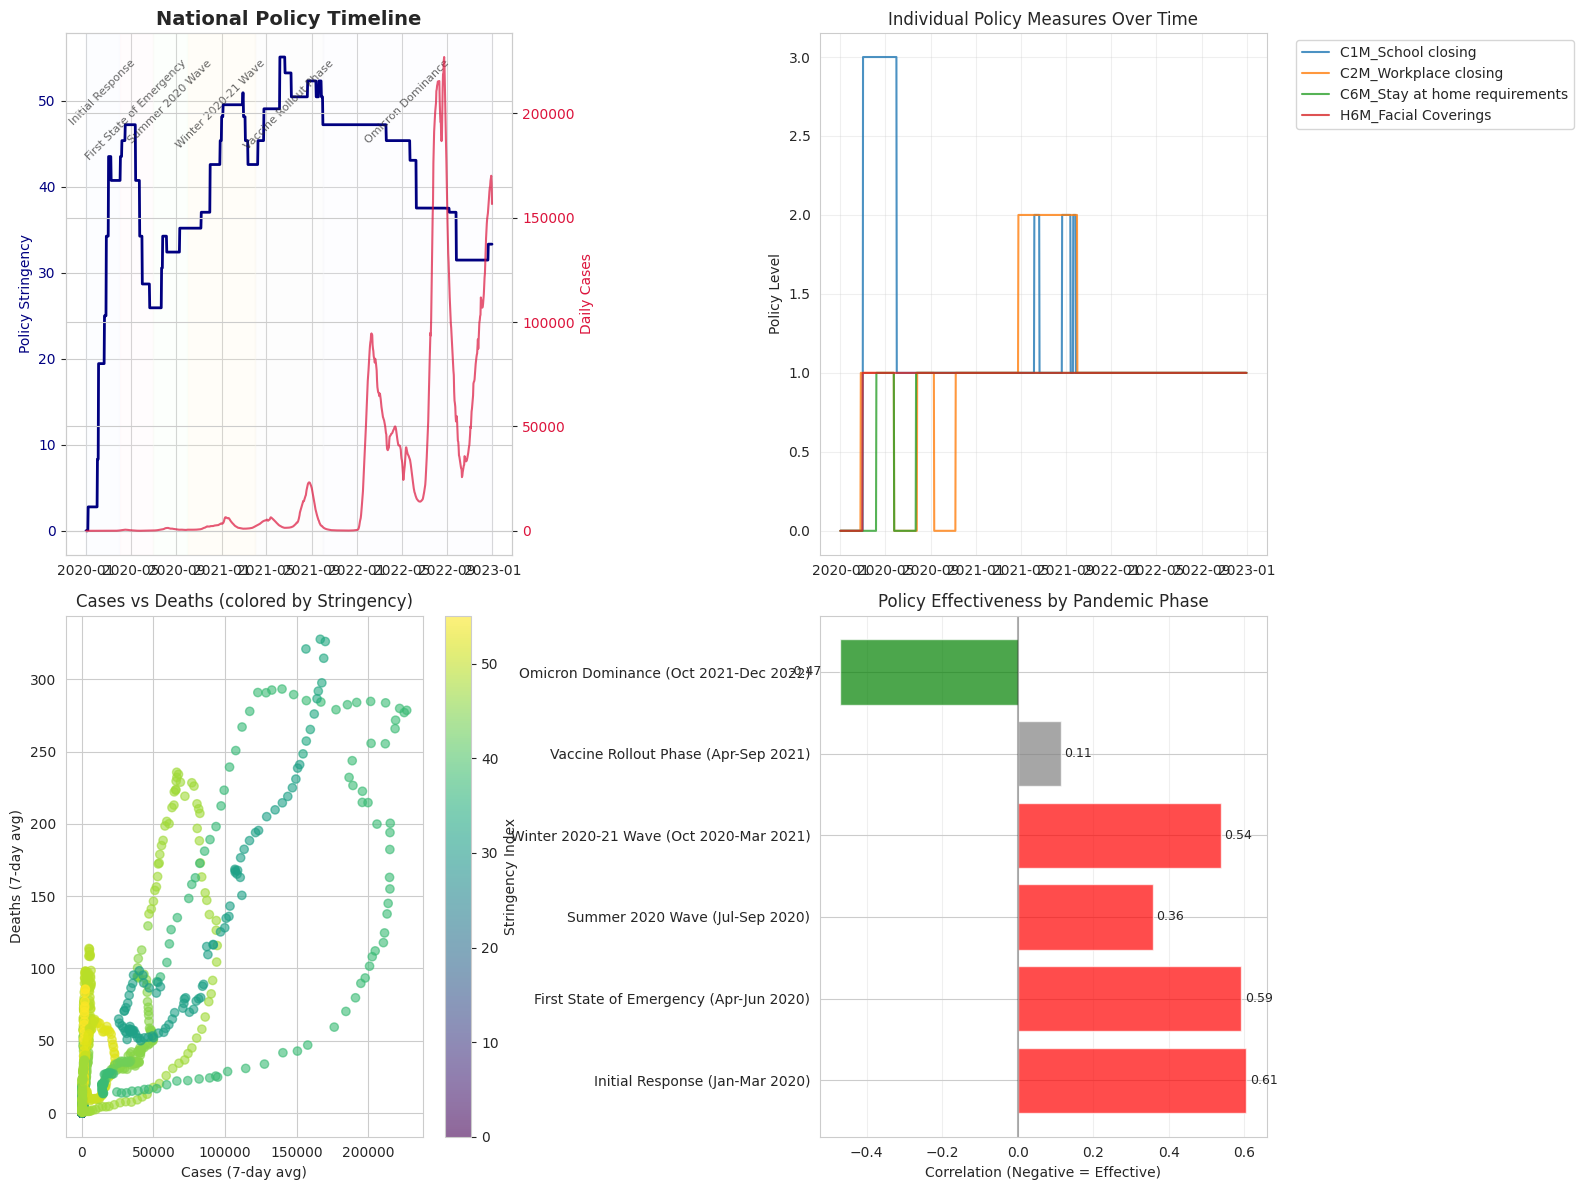

✓ National policy timeline with pandemic phases
✓ Individual policy measure trends
✓ Case-death relationship with policy context
✓ Phase-by-phase policy effectiveness assessment


In [18]:
print("\n" + "="*80)
print("PART 2: NATIONAL POLICY EFFECTIVENESS OVER TIME")
print("="*80)

# Create comprehensive timeline visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Policy Stringency vs Cases
ax1.plot(df_jp['Date'], df_jp['StringencyIndex_Average'],
         color='navy', linewidth=2, label='Stringency Index')
ax1.set_ylabel('Policy Stringency', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_title('National Policy Timeline', fontsize=14, fontweight='bold')

# Cases on second y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(df_jp['Date'], df_jp['Cases_7dayAvg'],
              color='crimson', alpha=0.7, label='Cases (7-day avg)')
ax1_twin.set_ylabel('Daily Cases', color='crimson')
ax1_twin.tick_params(axis='y', labelcolor='crimson')

# Add phase backgrounds
colors = ['#f0f8ff', '#fff0f5', '#f0fff0', '#fff8dc', '#f5f5f5', '#f8f8ff']
for i, (phase_name, (start, end)) in enumerate(pandemic_phases.items()):
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end),
                alpha=0.2, color=colors[i % len(colors)])
    # Add phase labels
    mid_date = pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2
    ax1.text(mid_date, ax1.get_ylim()[1] * 0.95, phase_name.split('\n')[0],
             ha='center', va='top', fontsize=8, rotation=45, alpha=0.7)

# 2. Policy Components Breakdown
policy_columns = ['C1M_School closing', 'C2M_Workplace closing',
                  'C6M_Stay at home requirements', 'H6M_Facial Coverings']

for col in policy_columns:
    ax2.plot(df_jp['Date'], df_jp[col], label=col, alpha=0.8)
ax2.set_title('Individual Policy Measures Over Time')
ax2.set_ylabel('Policy Level')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# 3. Cases vs Deaths correlation
scatter = ax3.scatter(df_jp['Cases_7dayAvg'], df_jp['Deaths_7dayAvg'],
                     c=df_jp['StringencyIndex_Average'],
                     cmap='viridis', alpha=0.6)
ax3.set_xlabel('Cases (7-day avg)')
ax3.set_ylabel('Deaths (7-day avg)')
ax3.set_title('Cases vs Deaths (colored by Stringency)')
plt.colorbar(scatter, ax=ax3, label='Stringency Index')

# 4. Policy Effectiveness by Phase
phase_effectiveness = []
for phase_name, (start, end) in pandemic_phases.items():
    phase_data = df_jp[(df_jp['Date'] >= start) & (df_jp['Date'] <= end)]
    if len(phase_data) > 10:
        corr = phase_data[['DailyCases', 'StringencyIndex_Average']].corr().iloc[0,1]
        phase_effectiveness.append({
            'Phase': phase_name.replace('\n', ' '),
            'Correlation': corr,
            'Effectiveness': 'Negative' if corr < -0.3 else 'Weak' if abs(corr) < 0.3 else 'Mixed'
        })

effectiveness_df = pd.DataFrame(phase_effectiveness)
colors = ['green' if x['Correlation'] < -0.3 else 'red' if x['Correlation'] > 0.3 else 'gray'
          for x in phase_effectiveness]

bars = ax4.barh([x['Phase'] for x in phase_effectiveness],
                [x['Correlation'] for x in phase_effectiveness],
                color=colors, alpha=0.7)
ax4.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax4.set_xlabel('Correlation (Negative = Effective)')
ax4.set_title('Policy Effectiveness by Pandemic Phase')
ax4.grid(True, alpha=0.3, axis='x')

# Add correlation values on bars
for bar, eff in zip(bars, phase_effectiveness):
    width = bar.get_width()
    ax4.text(width + (0.01 if width >= 0 else -0.05), bar.get_y() + bar.get_height()/2,
             f'{eff["Correlation"]:.2f}', ha='left' if width >= 0 else 'right',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ National policy timeline with pandemic phases")
print("✓ Individual policy measure trends")
print("✓ Case-death relationship with policy context")
print("✓ Phase-by-phase policy effectiveness assessment")

## Model Optimization with Available Features

In [23]:
print("\n" + "="*80)
print("PART 3: MODEL OPTIMIZATION WITH NATIONAL DATA")
print("="*80)

# Feature engineering with available national data
def create_national_features(df):
    """Create features from national-level time series"""
    df_feat = df.copy()

    # Lagged features
    for lag in [1, 3, 7, 14, 21]:
        df_feat[f'cases_lag_{lag}'] = df_feat['DailyCases'].shift(lag)
        df_feat[f'stringency_lag_{lag}'] = df_feat['StringencyIndex_Average'].shift(lag)
        df_feat[f'deaths_lag_{lag}'] = df_feat['DailyDeaths'].shift(lag)

    # Rolling statistics
    for window in [7, 14]:
        df_feat[f'cases_ma_{window}'] = df_feat['DailyCases'].rolling(window).mean()
        df_feat[f'stringency_ma_{window}'] = df_feat['StringencyIndex_Average'].rolling(window).mean()
        df_feat[f'cases_trend_{window}'] = df_feat['DailyCases'].rolling(window).apply(
            lambda x: np.polyfit(range(len(x)), x, 1)[0] if len(x) > 1 else np.nan, raw=True)


    # Temporal features
    df_feat['day_of_week'] = df_feat['Date'].dt.dayofweek
    df_feat['day_of_year'] = df_feat['Date'].dt.dayofyear
    df_feat['month'] = df_feat['Date'].dt.month
    df_feat['is_weekend'] = df_feat['Date'].dt.dayofweek.isin([5, 6]).astype(int)

    # Policy change indicators
    df_feat['stringency_change'] = df_feat['StringencyIndex_Average'].diff()
    df_feat['major_policy_change'] = (df_feat['stringency_change'].abs() > 5).astype(int)

    return df_feat

# Prepare data
df_model = create_national_features(df_jp)

# Drop rows where the target variable is NaN
df_model.dropna(subset=['DailyCases'], inplace=True)


feature_cols = [col for col in df_model.columns if any(x in col for x in ['lag', 'ma', 'trend', 'change'])]
feature_cols.extend(['day_of_week', 'month', 'is_weekend'])

# Identify and remove non-numeric columns from features
non_numeric_cols = df_model[feature_cols].select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric feature columns: {list(non_numeric_cols)}")
    feature_cols = [col for col in feature_cols if col not in non_numeric_cols]


X = df_model[feature_cols]
y = df_model['DailyCases']


print(f"Shape of df_model after feature creation and dropping NaNs: {df_model.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Available features: {len(feature_cols)}")
print(f"Time periods: {len(X)} days")
print(f"Target: Daily new cases prediction")


# Time-series cross validation
tscv = TimeSeriesSplit(n_splits=5)

print("\n🧠 MODEL OPTIMIZATION RESULTS:")
print("-" * 50)

# Random Forest Optimization
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=tscv,
                      scoring='neg_mean_absolute_error', verbose=0)
rf_grid.fit(X, y)

print(f"Random Forest - Best MAE: {-rf_grid.best_score_:.0f} cases")
print(f"Random Forest - Best params: {rf_grid.best_params_}")

# Feature importance analysis
best_rf = rf_grid.best_estimator_
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 TOP 10 MOST IMPORTANT FEATURES:")
print(feature_importance.head(10).round(4))


PART 3: MODEL OPTIMIZATION WITH NATIONAL DATA
Dropping non-numeric feature columns: ['C1M_Flag', 'C2M_Flag', 'C3M_Flag', 'C4M_Flag', 'C5M_Flag', 'C6M_Flag', 'C7M_Flag', 'E1_Flag', 'H1_Flag', 'H6M_Flag', 'H7_Flag', 'H8M_Flag', 'V2B_Vaccine age eligibility/availability age floor (general population summary)', 'V2C_Vaccine age eligibility/availability age floor (at risk summary)']
Shape of df_model after feature creation and dropping NaNs: (1095, 85)
Shape of X: (1095, 31)
Shape of y: (1095,)
Available features: 31
Time periods: 1095 days
Target: Daily new cases prediction

🧠 MODEL OPTIMIZATION RESULTS:
--------------------------------------------------
Random Forest - Best MAE: 15045 cases
Random Forest - Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

📊 TOP 10 MOST IMPORTANT FEATURES:
           feature  importance
20      cases_ma_7      0.6889
11     cases_lag_7      0.1598
5      cases_lag_1      0.0632
23     cases_ma_14      0.0222
8      cases_lag_3  

## National-Level Insights & Findings


In [25]:
print("\n" + "="*80)
print("PART 4: NATIONAL-LEVEL FINDINGS & RECOMMENDATIONS")
print("="*80)

# Calculate key national metrics
total_cases = df_jp['DailyCases'].sum()
total_deaths = df_jp['DailyDeaths'].sum()
avg_stringency = df_jp['StringencyIndex_Average'].mean()
peak_cases = df_jp['DailyCases'].max()
peak_stringency = df_jp['StringencyIndex_Average'].max()

print("📈 KEY NATIONAL METRICS:")
print("-" * 40)
print(f"Total reported cases: {total_cases:,.0f}")
print(f"Total reported deaths: {total_deaths:,.0f}")
print(f"Average stringency index: {avg_stringency:.1f}/100")
print(f"Peak daily cases: {peak_cases:,.0f}")
print(f"Peak stringency: {peak_stringency:.1f}/100")

print("\n🔍 POLICY EFFECTIVENESS INSIGHTS:")
print("-" * 40)

# Overall correlation
overall_corr = df_jp[['DailyCases', 'StringencyIndex_Average']].corr().iloc[0,1]
effectiveness = "NEGATIVE (effective)" if overall_corr < -0.2 else "WEAK" if abs(overall_corr) < 0.2 else "MIXED"

print(f"Overall policy-case correlation: {overall_corr:.3f} ({effectiveness})")

# Phase-specific insights
print("\n📅 PANDEMIC PHASE ANALYSIS:")
print("-" * 40)
for phase in phase_effectiveness:
    direction = "helpful" if phase['Correlation'] < -0.2 else "limited impact" if abs(phase['Correlation']) < 0.2 else "mixed results"
    print(f"• {phase['Phase']}: {phase['Correlation']:.3f} ({direction})")

print("\n🎯 MODELING INSIGHTS:")
print("-" * 40)
print(f"Best model performance: {-(rf_grid.best_score_):.0f} cases MAE")
print("Top predictive features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  • {row['feature']}: {row['importance']:.3f}")

print("\n⚠️  LIMITATIONS & RECOMMENDATIONS:")
print("-" * 40)
recommendations = [
    "DATA: Only national-level analysis possible with current dataset",
    "GEOGRAPHY: No regional/prefecture breakdown available",
    "CAUSALITY: Correlation ≠ causation - many confounding factors",
    "CONTEXT: Cultural, behavioral factors not captured in policy indices",
]

for rec in recommendations:
    print(f"• {rec}")

print("\n" + "="*80)
print("CONCLUSION: While geographic analysis isn't possible with national data,")
print("we gain valuable insights into Japan's national policy effectiveness")
print("and temporal patterns throughout the pandemic.")
print("="*80)


PART 4: NATIONAL-LEVEL FINDINGS & RECOMMENDATIONS
📈 KEY NATIONAL METRICS:
----------------------------------------
Total reported cases: 29,234,677
Total reported deaths: 57,284
Average stringency index: 40.4/100
Peak daily cases: 260,999
Peak stringency: 55.1/100

🔍 POLICY EFFECTIVENESS INSIGHTS:
----------------------------------------
Overall policy-case correlation: -0.085 (WEAK)

📅 PANDEMIC PHASE ANALYSIS:
----------------------------------------
• Initial Response (Jan-Mar 2020): 0.605 (mixed results)
• First State of Emergency (Apr-Jun 2020): 0.591 (mixed results)
• Summer 2020 Wave (Jul-Sep 2020): 0.358 (mixed results)
• Winter 2020-21 Wave (Oct 2020-Mar 2021): 0.537 (mixed results)
• Vaccine Rollout Phase (Apr-Sep 2021): 0.113 (limited impact)
• Omicron Dominance (Oct 2021-Dec 2022): -0.469 (helpful)

🎯 MODELING INSIGHTS:
----------------------------------------
Best model performance: 15045 cases MAE
Top predictive features:
  • cases_ma_7: 0.689
  • cases_lag_7: 0.160
  • c